In [19]:

# Basic libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import re
nltk.download('stopwords')


# Modeling
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vonha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vonha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df_all= pd.read_csv("D:\ML\Data\Complete_DataSet_Clean.csv")

In [21]:
df_all

,Unnamed: 0,title,text,label
0,0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0
1,1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1
2,2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1
3,3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0
4,4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1
...,...,...,...,...
26962,26962,’Last battle’ against Isis in Iraq: forces mas...,Iraqi and Kurdish forces are finalising plans ...,1
26963,26963,Kurds Worried Turkey Will Stab Them in the Bac...,Kurds Worried Turkey Will Stab Them in the Bac...,0
26964,26964,Falling Water review – dream-controlling sci-f...,"Falling Water, USA’s new thriller about luci...",1
26965,26965,Hampton Roadsâ€™ solution to stop the land fro...,"SEAFORD, VA. ” It looks like a mad scientis...",1


In [22]:
df_all=df_all.drop("Unnamed: 0",axis=1)

**Clean data**

In [23]:
def clean_duplicates(dataframe):

    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    dataframe.drop_duplicates(subset='text', inplace=True)
    
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [24]:
clean_duplicates(df_all)

New shape: (26967, 3)


,title,text,label
0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0
1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1
2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1
3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0
4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1


* Clean data and remove stop word

In [25]:

stop_words = stopwords.words('english')
def preprocess(text):
      text = text.lower()
      text = re.sub('\[.*?\]', '', text) # remove square brackets
      text = re.sub(r'[^\w\s]','',text) # remove punctuation
      text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
      text = re.sub(r'http\S+', '', text)
      text = re.sub('\n', '', text)
      # remove any stopwords
      return [word for word in text.split() if word.lower() not in stop_words]

     

In [26]:
clean_data = df_all.copy()
clean_data['text_clean'] = df_all.text.apply(preprocess)
clean_data['title_clean'] = df_all.title.apply(preprocess)
clean_data['text_clean']= clean_data['text_clean'].apply(lambda x:" ".join(x))
clean_data['title_clean']= clean_data['title_clean'].apply(lambda x:" ".join(x))

In [27]:
clean_data.head(5)

,title,text,label,text_clean,title_clean
0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0,change video luke rudkowski covers geopolitica...,putins latest attack hillary clinton us establ...
1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1,course six hours supposed republican existenti...,tuesday voters delivered stinging rebuke presi...
2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1,breaking news stories especially ones based so...,clinton email probe questions answers
3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0,us insiders russia leaked clinton emails washi...,us insiders russia leaked clinton emails
4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1,beyond precedent justice department particular...,top cop thought prosecutor


* Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('wordnet')
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vonha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
lemmatize_data  = clean_data.copy()
lemmatize_data['text_clean'] = clean_data.text_clean.apply(lambda x : word_lemmatizer(x))
lemmatize_data['title_clean'] = clean_data.title_clean.apply(lambda x : word_lemmatizer(x))

In [30]:
lemmatize_data

,title,text,label,text_clean,title_clean
0,PUTIN’S LATEST ATTACK AGAINST HILLARY CLINTON ...,We Are Change \nIn this video Luke Rudkowski c...,0,change video luke rudkowski cover geopolitical...,putin latest attack hillary clinton u establis...
1,"On Tuesday, Voters Delivered a Stinging Rebuke...","In the course of about six hours, what was sup...",1,course six hour supposed republican existentia...,tuesday voter delivered stinging rebuke presid...
2,The Clinton email probe: Questions and answers,"Most breaking news stories, especiall...",1,breaking news story especially one based sourc...,clinton email probe question answer
3,US Insiders  Not Russia  Leaked Clinton Emails,US Insiders  Not Russia  Leaked Clinton Ema...,0,u insider russia leaked clinton email washingt...,u insider russia leaked clinton email
4,The top cop who thought he was a prosecutor,Beyond the precedent that the Justice Departm...,1,beyond precedent justice department particular...,top cop thought prosecutor
...,...,...,...,...,...
26962,’Last battle’ against Isis in Iraq: forces mas...,Iraqi and Kurdish forces are finalising plans ...,1,iraqi kurdish force finalising plan attack las...,last battle isi iraq force mass mosul assault
26963,Kurds Worried Turkey Will Stab Them in the Bac...,Kurds Worried Turkey Will Stab Them in the Bac...,0,kurd worried turkey stab back fight isi turkey...,kurd worried turkey stab back fight isi
26964,Falling Water review – dream-controlling sci-f...,"Falling Water, USA’s new thriller about luci...",1,falling water usa new thriller lucid dreamer t...,falling water review dreamcontrolling scifi th...
26965,Hampton Roadsâ€™ solution to stop the land fro...,"SEAFORD, VA. ” It looks like a mad scientis...",1,seaford va look like mad scientist lab somethi...,hampton roadsâ solution stop land sinking wast...


In [31]:
### Assignig predictors and target values
X_text = lemmatize_data.text_clean.values
X_title = lemmatize_data.title_clean.values
y = lemmatize_data.label.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_text ,
                                                    y,test_size=0.2,
                                                    random_state=43)

In [33]:
print(X_train.shape)
print(type(X_train))

print(X_test.shape)
print(type(X_test))


(21573,)
<class 'numpy.ndarray'>
(5394,)
<class 'numpy.ndarray'>


**Vectorize Article Text (Bag of words)**

In [34]:
count_vectorizer = CountVectorizer() 
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

In [35]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [36]:
# print("count_train: ",count_train.shape)
# print("count_test: ",count_test.shape)
print("tfidf_train: ",tfidf_train.shape)
print("tfidf_test: ",tfidf_test.shape)

tfidf_train:  (21573, 202048)
tfidf_test:  (5394, 202048)


* Method 1 A: Naive Bayes Classifier (Tfidf vectors)

accuracy_score:   0.54
f1_macro:   0.54


Text(0.5, 51.0, 'Predicted Naive Bayes_tfidf')

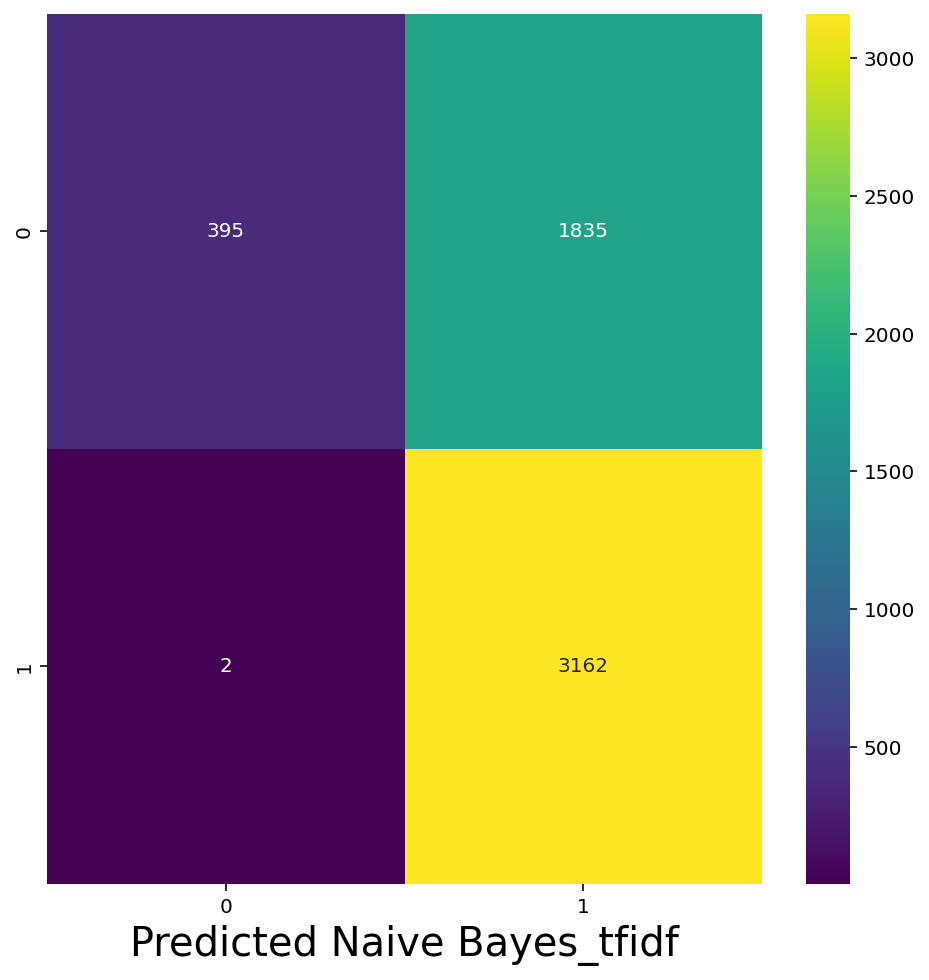

In [37]:
nb_1A = MultinomialNB() 
nb_1A.fit(tfidf_train, y_train)
pred_nb_1A = nb_1A.predict(tfidf_test)
accuracy = metrics.accuracy_score(y_test, pred_nb_1A)
f1_pred_nb_1A = metrics.f1_score(y_test, pred_nb_1A,average='macro')
accuracy_pred_nb_1A = metrics.accuracy_score(y_test,pred_nb_1A)
   
print("accuracy_score:   %0.2f" % f1_pred_nb_1A)
print("f1_macro:   %0.2f" % f1_pred_nb_1A)


cm = confusion_matrix(list(y_test), pred_nb_1A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted Naive Bayes_tfidf', size=20)

# matrix = confusion_matrix(pred_nb_1A, y_test, normalize='all')
# plt.figure(figsize=(16, 9))
# ax= plt.subplot()
# sns.heatmap(matrix, annot=True, ax = ax)
# ax.set_xlabel('Predicted Labels', size=20)

Method 1 B: Naive Bayes Classifier (Count vectors)

accuracy_score:   0.85
f1_macro:   0.83


Text(0.5, 51.0, 'Predicted Naive Bayes_count')

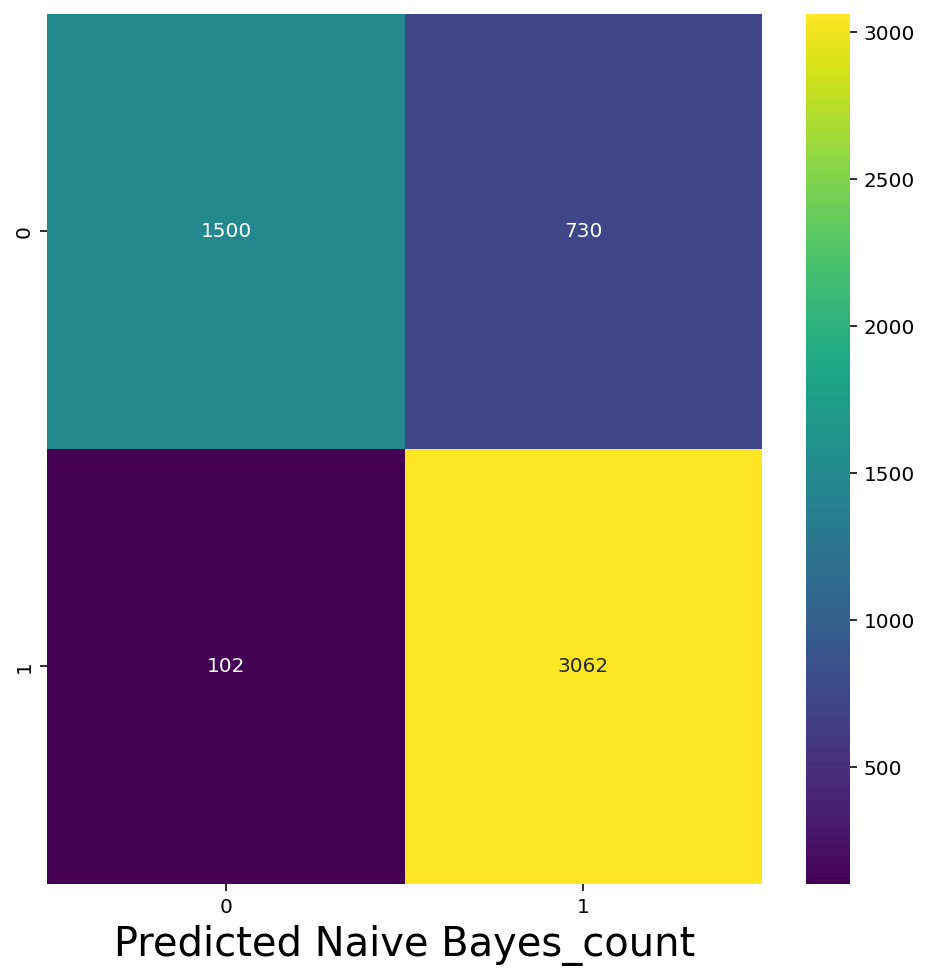

In [38]:
nb_1B = MultinomialNB() 
nb_1B.fit(count_train, y_train)
pred_nb_1B = nb_1B.predict(count_test)
f1_pred_nb_1B = metrics.f1_score(y_test, pred_nb_1B,average='macro')
accuracy_pred_nb_1B = metrics.accuracy_score(y_test,pred_nb_1B)
   
print("accuracy_score:   %0.2f" % accuracy_pred_nb_1B)
print("f1_macro:   %0.2f" % f1_pred_nb_1B)



cm = confusion_matrix(list(y_test), pred_nb_1B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted Naive Bayes_count', size=20)


* Method 2 A : Passive Aggressive Classifier (Tfidf vectors)

accuracy_score:   0.93
f1_macro:   0.93


Text(0.5, 51.0, 'Predicted PassiveAggressive_tfidf')

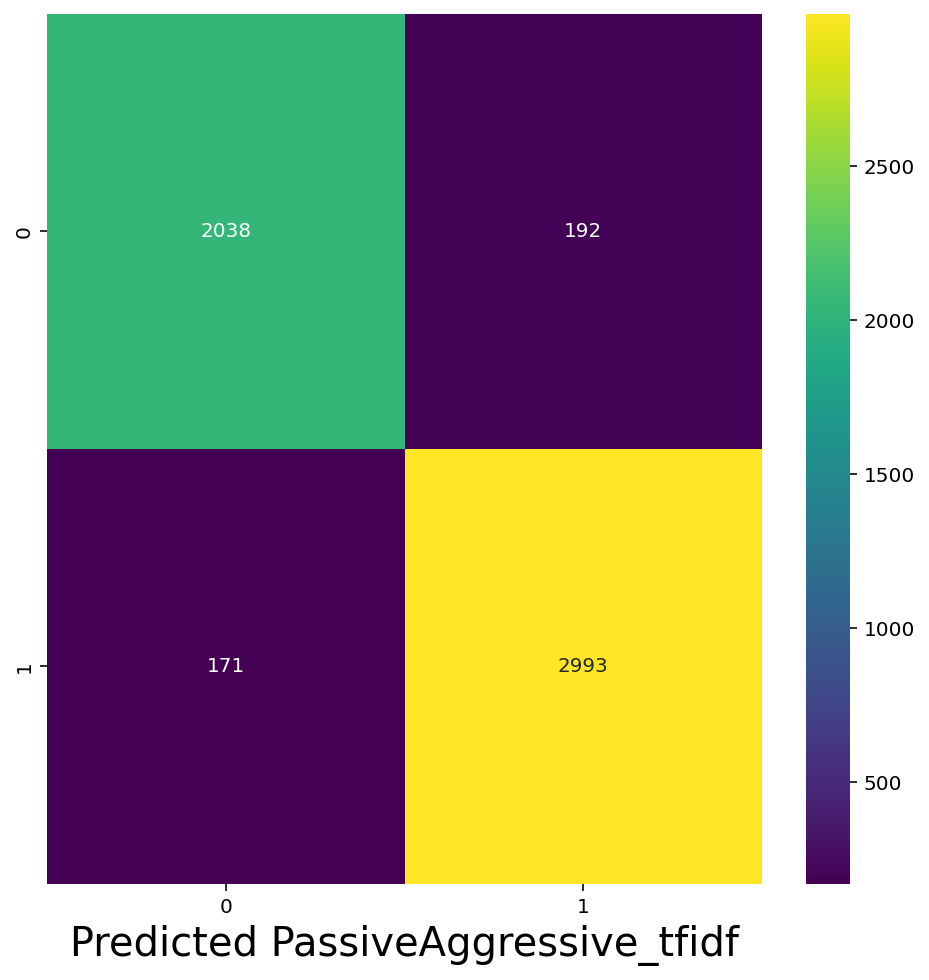

In [39]:
passive_2A = PassiveAggressiveClassifier()
passive_2A.fit(tfidf_train,  y_train)
pred_Passive_2A = passive_2A.predict(tfidf_test)
f1_passive_2A = metrics.f1_score(y_test, pred_Passive_2A,average='macro')
accuracy_passive_2A = metrics.accuracy_score(y_test,pred_Passive_2A)
   
print("accuracy_score:   %0.2f" % accuracy_passive_2A)
print("f1_macro:   %0.2f" % f1_passive_2A )



cm = confusion_matrix(list(y_test),  pred_Passive_2A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_tfidf', size=20)

* Method 2 B: Passive Aggressive Classifier (Count vectors)

accuracy_score:   0.90
f1_macro:   0.90


Text(0.5, 51.0, 'Predicted PassiveAggressive_count')

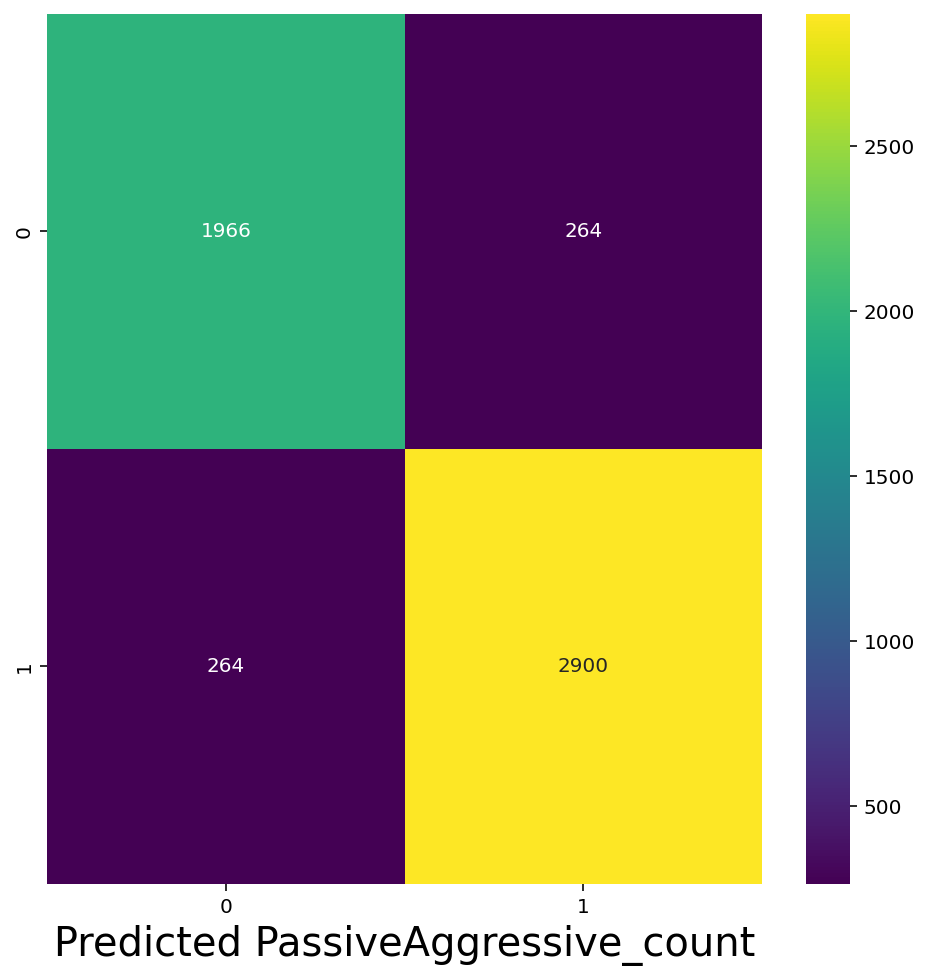

In [40]:
passive_2B = PassiveAggressiveClassifier()
passive_2B.fit(count_train, y_train)
pred_Passive_2B = passive_2B.predict(count_test)
f1_passive_2B = metrics.f1_score(y_test, pred_Passive_2B,average='macro')
accuracy_passive_2B = metrics.accuracy_score(y_test,pred_Passive_2B)
   
print("accuracy_score:   %0.2f" % accuracy_passive_2B)
print("f1_macro:   %0.2f" % f1_passive_2B)

cm = confusion_matrix(list(y_test),  pred_Passive_2B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)


* Method 3 A: Logistic Regression (Count vectors)

accuracy_score:   0.92
f1_macro:   0.92


C:\Users\vonha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 51.0, 'Predicted PassiveAggressive_count')

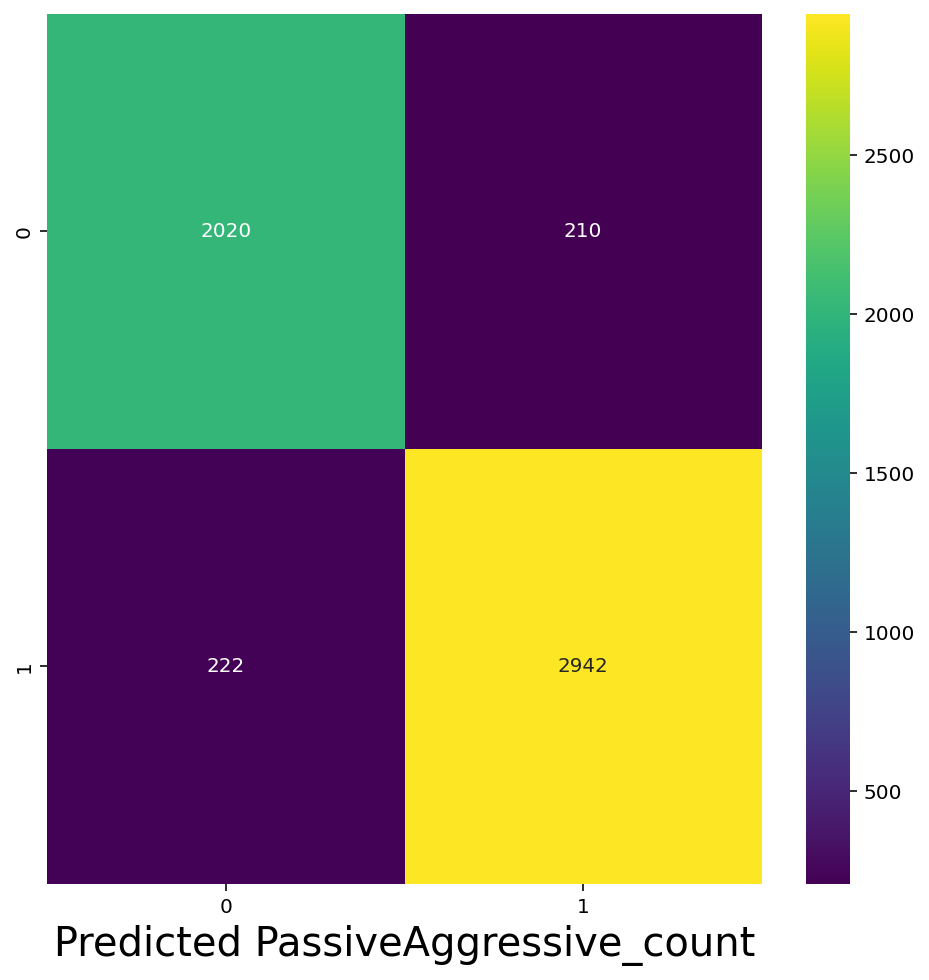

In [41]:
logistic_3A = LogisticRegression()
logistic_3A.fit(count_train, y_train)
pred_logistic_3A = logistic_3A.predict(count_test)
f1_logistic_3A = metrics.f1_score(y_test, pred_logistic_3A,average='macro')
accuracy_logistic_3A = metrics.accuracy_score(y_test,pred_logistic_3A)
   
print("accuracy_score:   %0.2f" % accuracy_logistic_3A)
print("f1_macro:   %0.2f" % f1_logistic_3A)

cm = confusion_matrix(list(y_test),  pred_logistic_3A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)

Method 3 B: Logistic Regression (tfidf vector)

accuracy_score:   0.91
f1_macro:   0.91


Text(0.5, 51.0, 'Predicted PassiveAggressive_count')

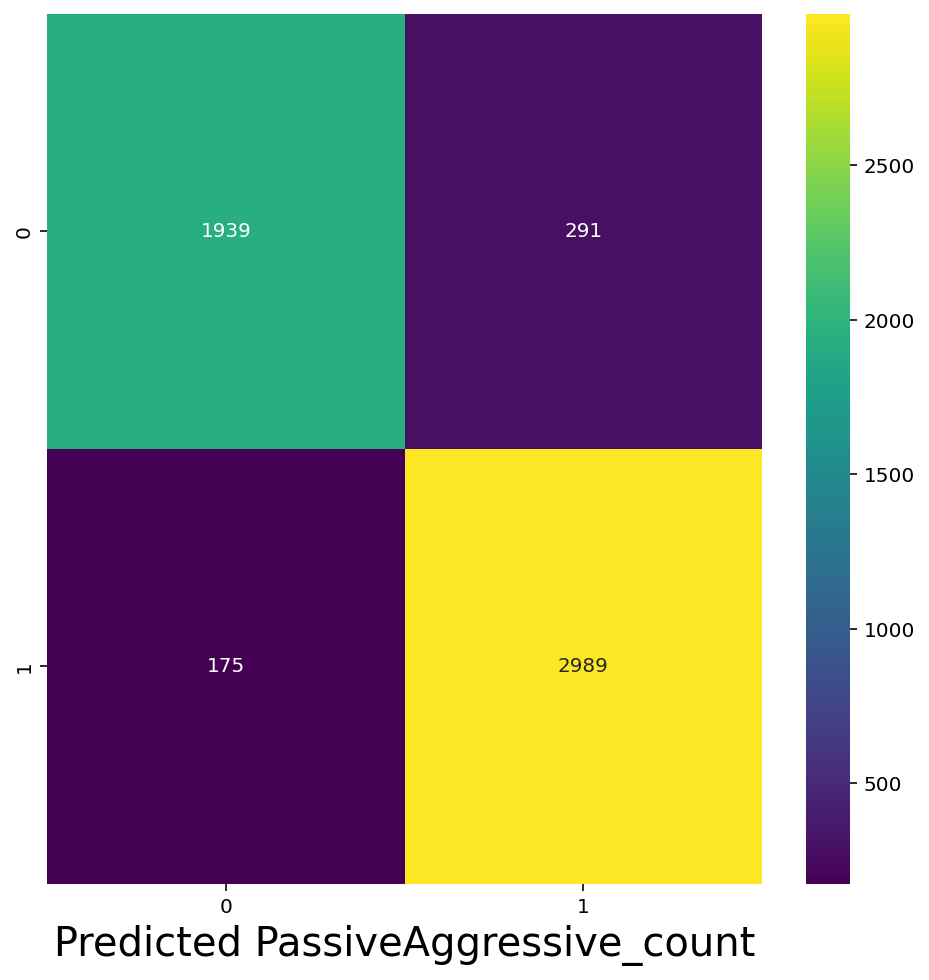

In [42]:
logistic_3B = LogisticRegression()
logistic_3B.fit(tfidf_train, y_train)
pred_logistic_3B = logistic_3B.predict(tfidf_test)
f1_logistic_3B = metrics.f1_score(y_test, pred_logistic_3B,average='macro')
accuracy_logistic_3B = metrics.accuracy_score(y_test,pred_logistic_3B)
   
print("accuracy_score:   %0.2f" % accuracy_logistic_3B)
print("f1_macro:   %0.2f" % f1_logistic_3B )

cm = confusion_matrix(list(y_test),  pred_logistic_3B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)

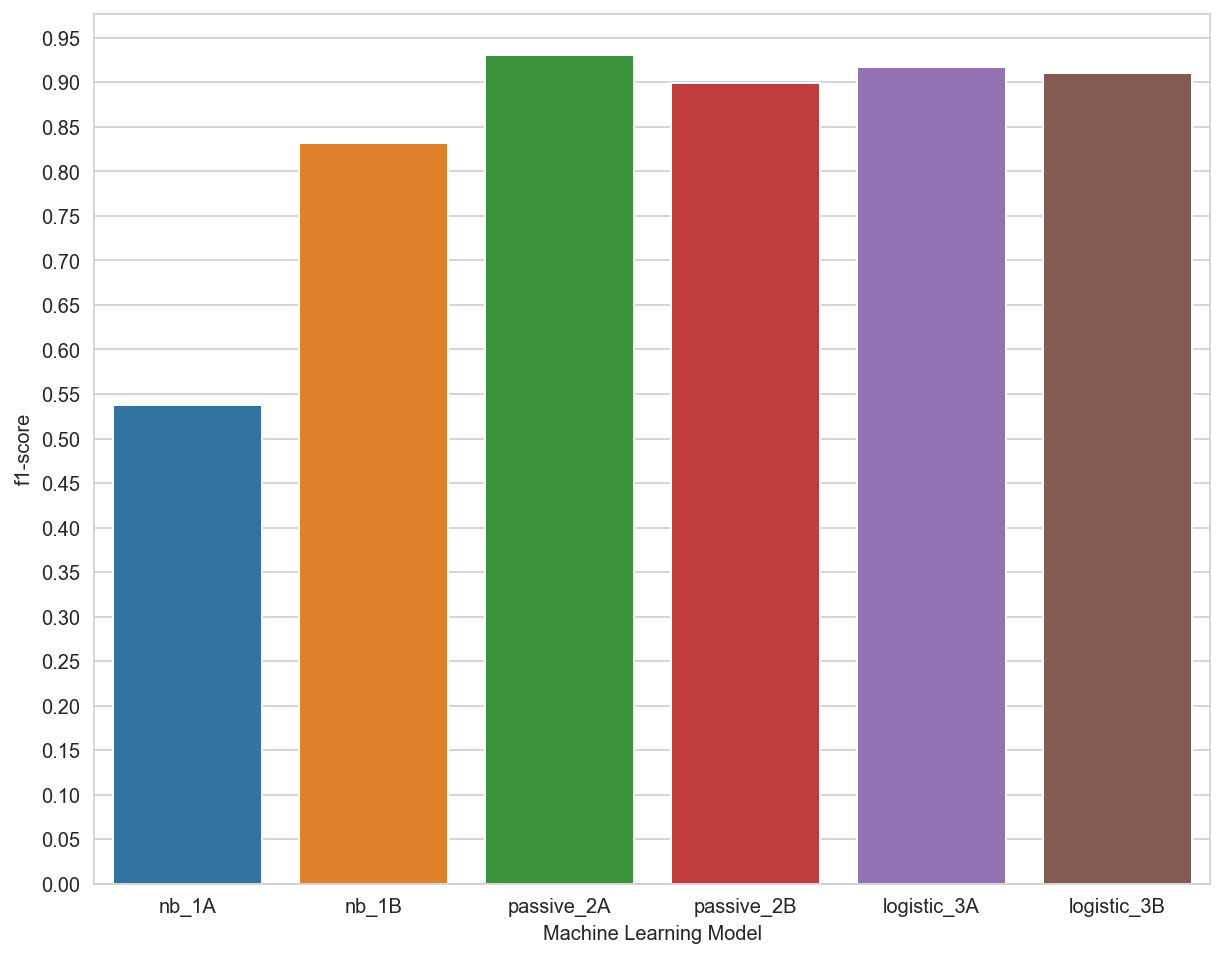

In [43]:
model = ['nb_1A', 'nb_1B','passive_2A','passive_2B','logistic_3A','logistic_3B']
f1_score = [f1_pred_nb_1A,f1_pred_nb_1B, f1_passive_2A ,f1_passive_2B,f1_logistic_3A,f1_logistic_3B]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()

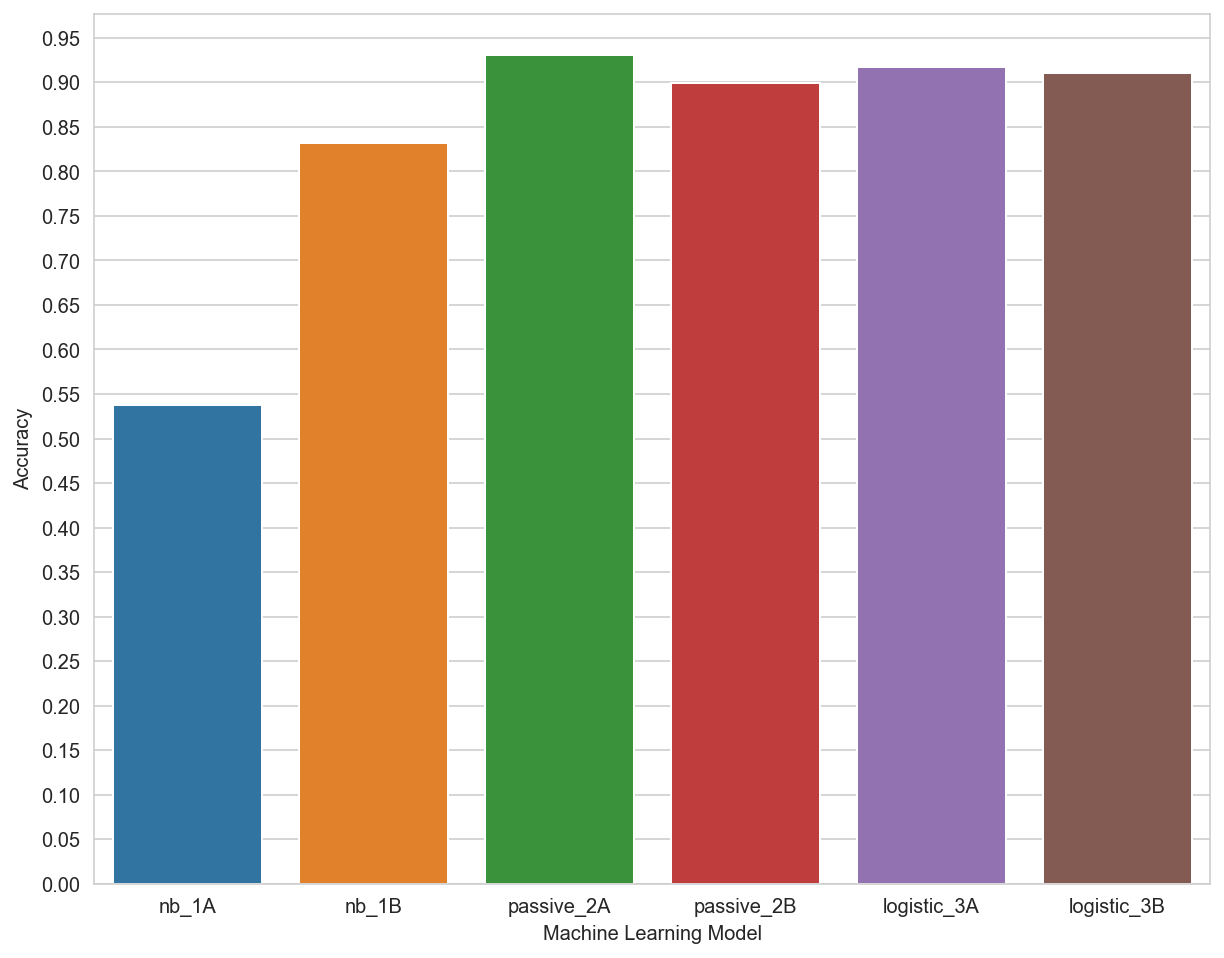

In [44]:
model = ['nb_1A', 'nb_1B','passive_2A','passive_2B','logistic_3A','logistic_3B']
Accuracy = [accuracy_pred_nb_1A,accuracy_pred_nb_1B, accuracy_passive_2A ,accuracy_passive_2B,accuracy_logistic_3A,accuracy_logistic_3B]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()

* Check

accuracy_score:   0.89
f1_macro:   0.89


Text(0.5, 52.0, 'Predicted Naive Bayes_tfidf')

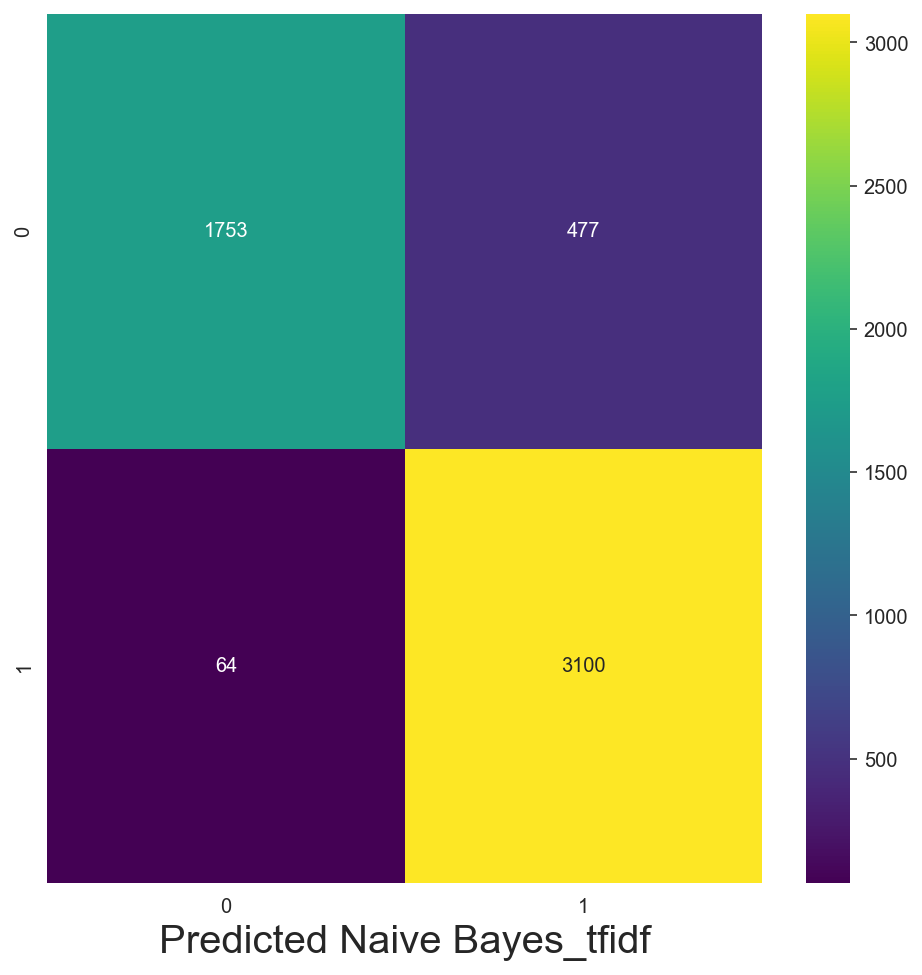

In [45]:
nb_1A = MultinomialNB(alpha = 0.01) 
tfidf_1A = TfidfVectorizer(max_df= 0.75,min_df=5,ngram_range=(1, 3))
tfidf_1A.fit(X_train)
tfidf_train = tfidf_1A.transform(X_train)
tfidf_test = tfidf_1A.transform(X_test)
nb_1A.fit(tfidf_train, y_train)
pred_nb_1A = nb_1A.predict(tfidf_test)
accuracy = metrics.accuracy_score(y_test, pred_nb_1A)
f1_pred_nb_1A = metrics.f1_score(y_test, pred_nb_1A,average='macro')
accuracy_pred_nb_1A = metrics.accuracy_score(y_test,pred_nb_1A)
   
print("accuracy_score:   %0.2f" % f1_pred_nb_1A)
print("f1_macro:   %0.2f" % f1_pred_nb_1A)


cm = confusion_matrix(list(y_test), pred_nb_1A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted Naive Bayes_tfidf', size=20)

accuracy_score:   0.90
f1_macro:   0.89


Text(0.5, 52.0, 'Predicted Naive Bayes_count')

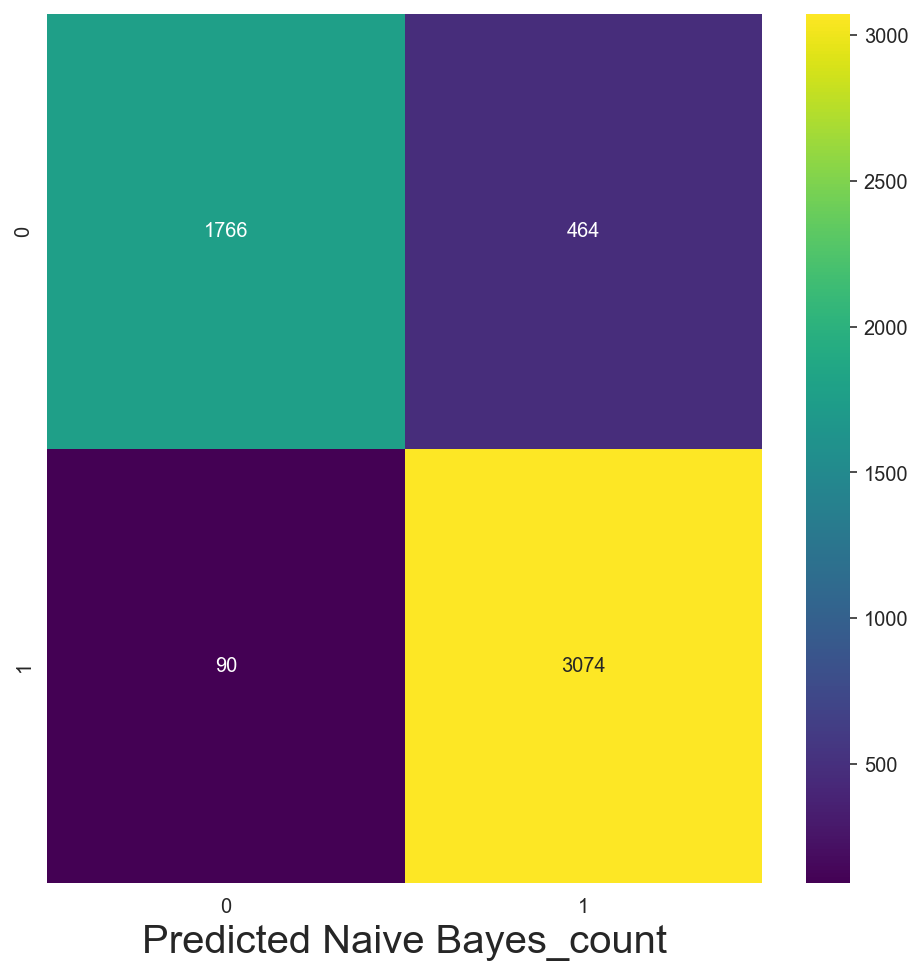

In [46]:
nb_1B = MultinomialNB(alpha = 0.1) 
count_1B = CountVectorizer(max_df= 0.75,min_df=5,ngram_range=(1, 3))
count_1B.fit(X_train)
count_train =count_1B.transform(X_train)
count_test =count_1B.transform(X_test)
nb_1B.fit(count_train, y_train)
pred_nb_1B = nb_1B.predict(count_test)
f1_pred_nb_1B = metrics.f1_score(y_test, pred_nb_1B,average='macro')
accuracy_pred_nb_1B = metrics.accuracy_score(y_test,pred_nb_1B)
   
print("accuracy_score:   %0.2f" % accuracy_pred_nb_1B)
print("f1_macro:   %0.2f" % f1_pred_nb_1B)



cm = confusion_matrix(list(y_test), pred_nb_1B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted Naive Bayes_count', size=20)

accuracy_score:   0.95
f1_macro:   0.95


Text(0.5, 52.0, 'Predicted PassiveAggressive_tfidf')

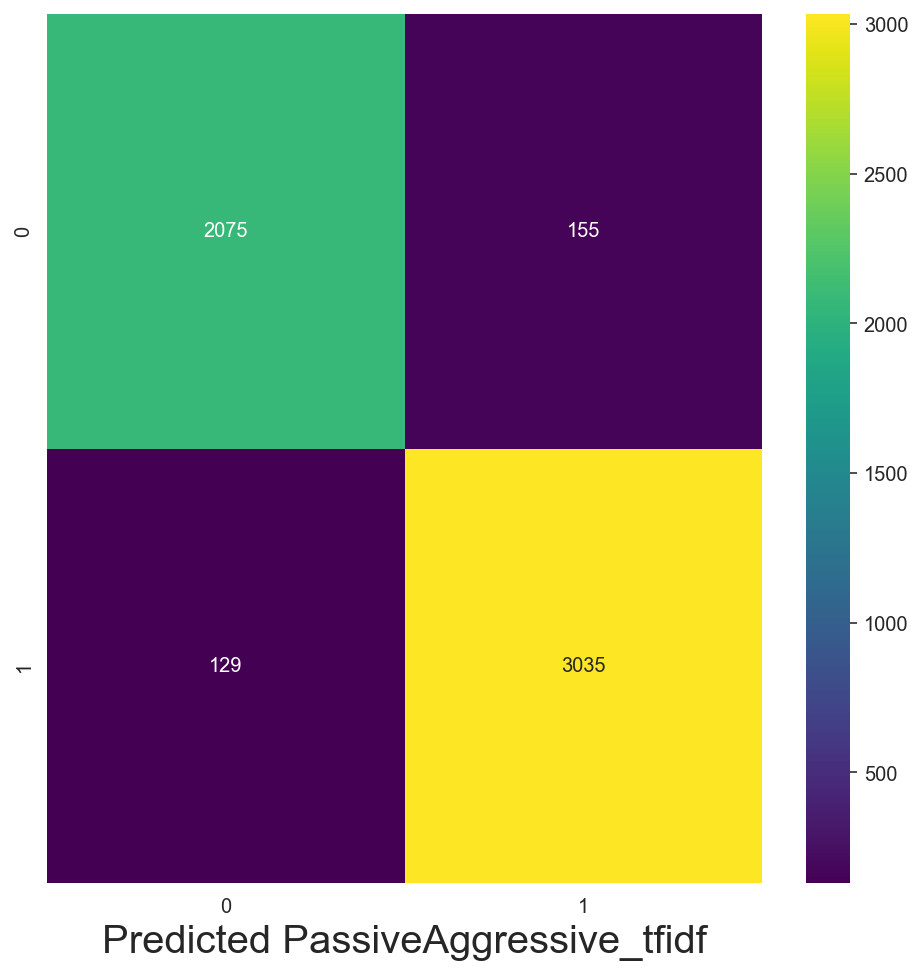

In [47]:
passive_2A = PassiveAggressiveClassifier(fit_intercept=True)
tfidf_2A = TfidfVectorizer(max_df= 0.9,min_df=4,ngram_range=(1, 3))
tfidf_2A.fit(X_train)
tfidf_train = tfidf_2A.transform(X_train)
tfidf_test = tfidf_2A.transform(X_test)
passive_2A.fit(tfidf_train,  y_train)
pred_Passive_2A = passive_2A.predict(tfidf_test)
f1_passive_2A = metrics.f1_score(y_test, pred_Passive_2A,average='macro')
accuracy_passive_2A = metrics.accuracy_score(y_test,pred_Passive_2A)
   
print("accuracy_score:   %0.2f" % accuracy_passive_2A)
print("f1_macro:   %0.2f" % f1_passive_2A )



cm = confusion_matrix(list(y_test),  pred_Passive_2A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_tfidf', size=20)

accuracy_score:   0.92
f1_macro:   0.92


Text(0.5, 52.0, 'Predicted PassiveAggressive_count')

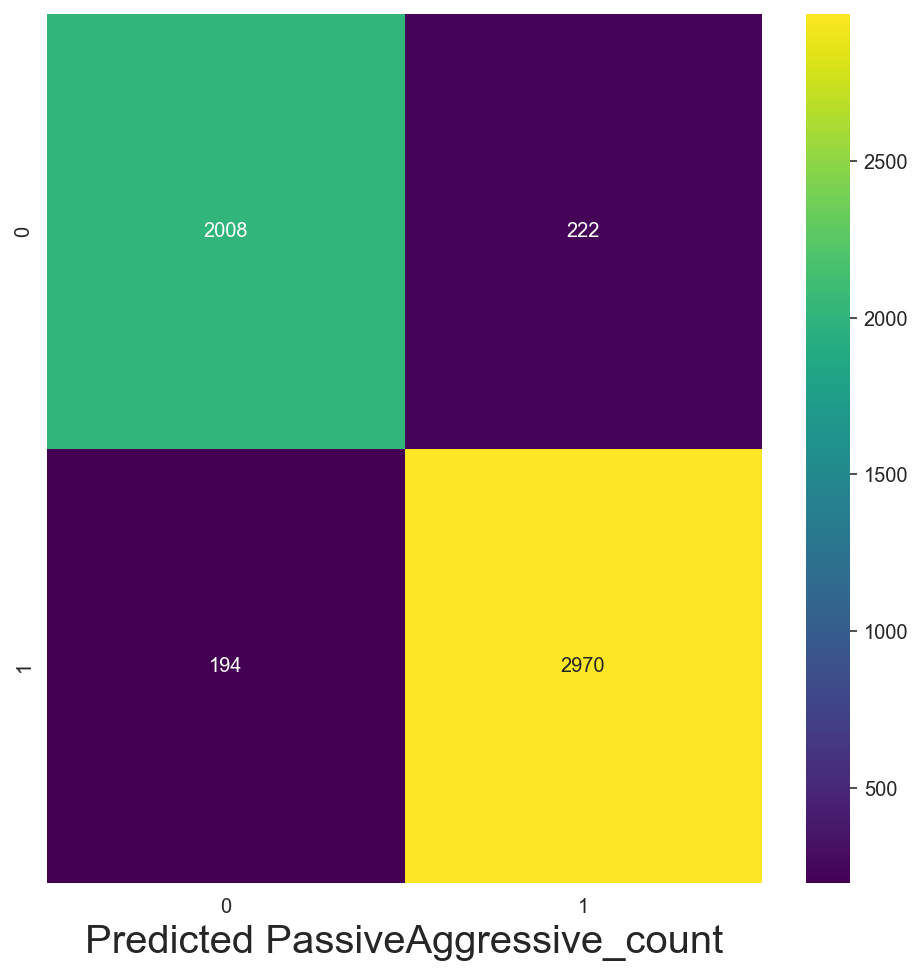

In [48]:
passive_2B = PassiveAggressiveClassifier(fit_intercept=True)
count_2B = CountVectorizer(max_df= 0.98,min_df=1,ngram_range=(1, 3))
count_2B.fit(X_train)
count_train = count_2B.transform(X_train)
count_test = count_2B.transform(X_test)
passive_2B.fit(count_train, y_train)
pred_Passive_2B = passive_2B.predict(count_test)
f1_passive_2B = metrics.f1_score(y_test, pred_Passive_2B,average='macro')
accuracy_passive_2B = metrics.accuracy_score(y_test,pred_Passive_2B)
   
print("accuracy_score:   %0.2f" % accuracy_passive_2B)
print("f1_macro:   %0.2f" % f1_passive_2B)

cm = confusion_matrix(list(y_test),  pred_Passive_2B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)

accuracy_score:   0.92
f1_macro:   0.92


Text(0.5, 52.0, 'Predicted PassiveAggressive_count')

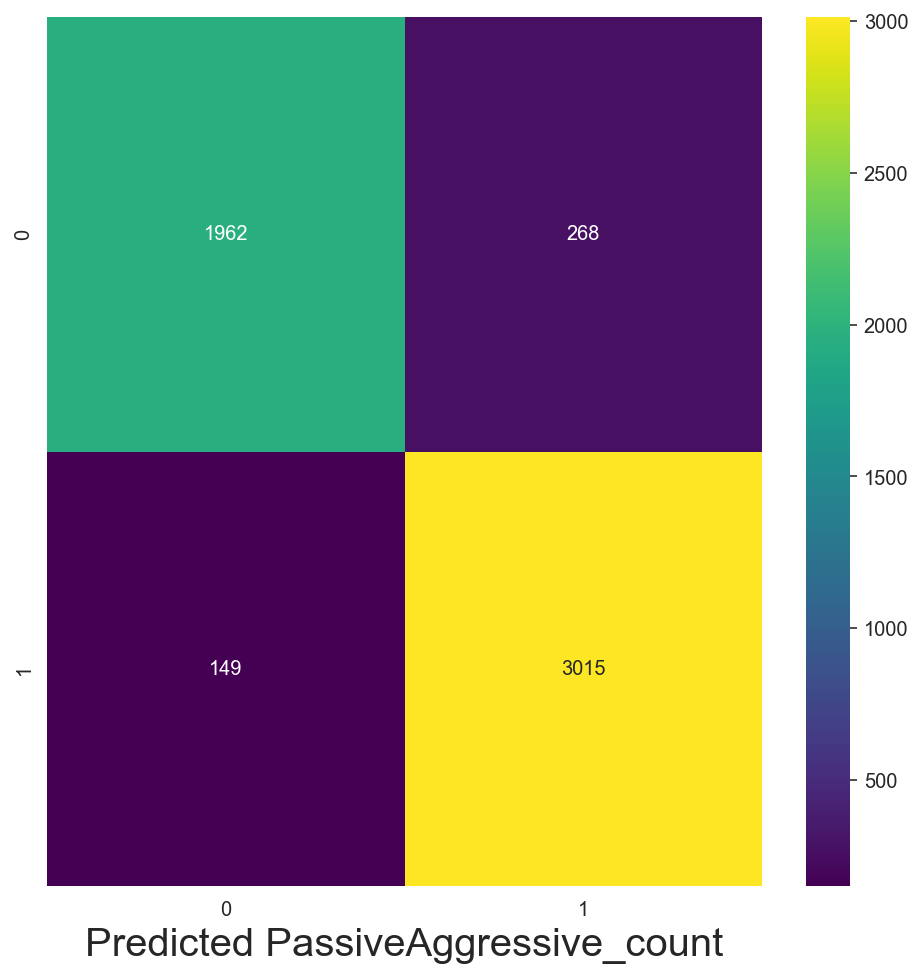

In [49]:
logistic_3B = LogisticRegression() 
tfidf_3B = TfidfVectorizer(max_df= 0.7,min_df=5,ngram_range=(1, 3))
tfidf_3B.fit(X_train)
tfidf_train = tfidf_3B.transform(X_train)
tfidf_test = tfidf_3B.transform(X_test)
logistic_3B.fit(tfidf_train, y_train)
pred_logistic_3B = logistic_3B.predict(tfidf_test)
f1_logistic_3B = metrics.f1_score(y_test, pred_logistic_3B,average='macro')
accuracy_logistic_3B = metrics.accuracy_score(y_test,pred_logistic_3B)
   
print("accuracy_score:   %0.2f" % accuracy_logistic_3B)
print("f1_macro:   %0.2f" % f1_logistic_3B )

cm = confusion_matrix(list(y_test),  pred_logistic_3B)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)

accuracy_score:   0.93
f1_macro:   0.93


C:\Users\vonha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 52.0, 'Predicted PassiveAggressive_count')

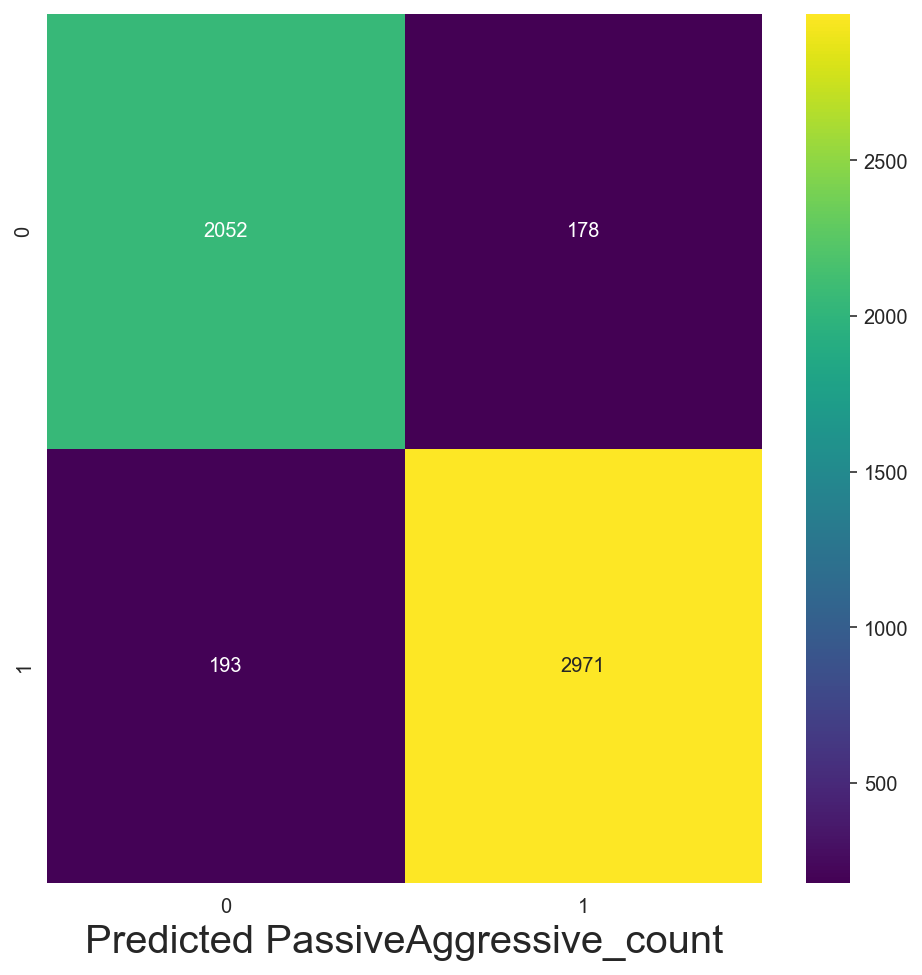

In [50]:
logistic_3A = LogisticRegression(penalty='l2') 
count_3A = CountVectorizer(max_df= 0.7,min_df=5,ngram_range=(1, 3))
count_3A.fit(X_train)
count_train = count_3A.transform(X_train)
count_test = count_3A.transform(X_test)
logistic_3A.fit(count_train, y_train)
pred_logistic_3A = logistic_3A.predict(count_test)
f1_logistic_3A = metrics.f1_score(y_test, pred_logistic_3A,average='macro')
accuracy_logistic_3A = metrics.accuracy_score(y_test,pred_logistic_3A)
   
print("accuracy_score:   %0.2f" % accuracy_logistic_3A)
print("f1_macro:   %0.2f" % f1_logistic_3A)

cm = confusion_matrix(list(y_test),  pred_logistic_3A)
plt.figure(figsize = (8, 8))
ax= plt.subplot()
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')
ax.set_xlabel('Predicted PassiveAggressive_count', size=20)

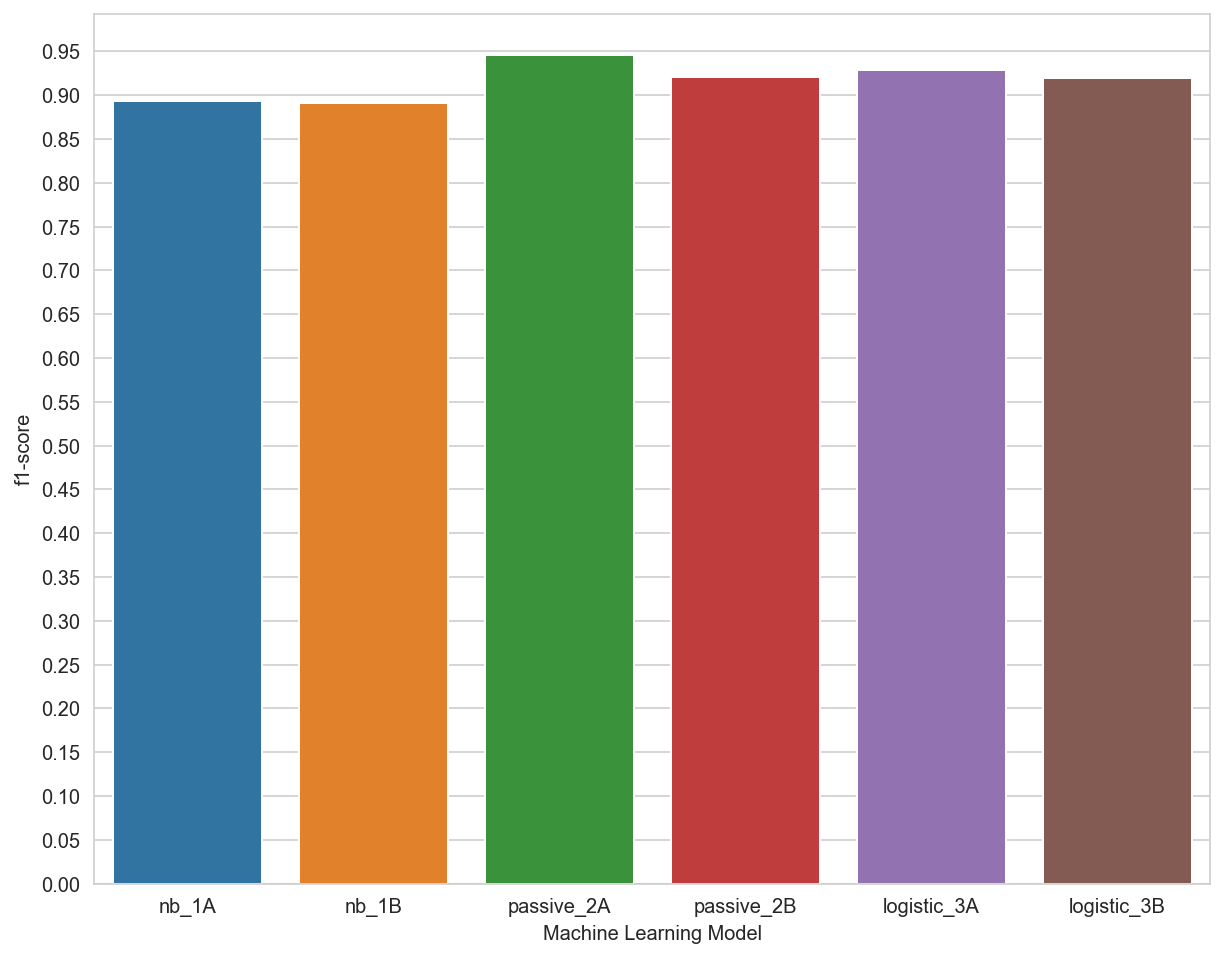

In [51]:
model = ['nb_1A', 'nb_1B','passive_2A','passive_2B','logistic_3A','logistic_3B']
f1_score = [f1_pred_nb_1A,f1_pred_nb_1B, f1_passive_2A ,f1_passive_2B,f1_logistic_3A,f1_logistic_3B]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()

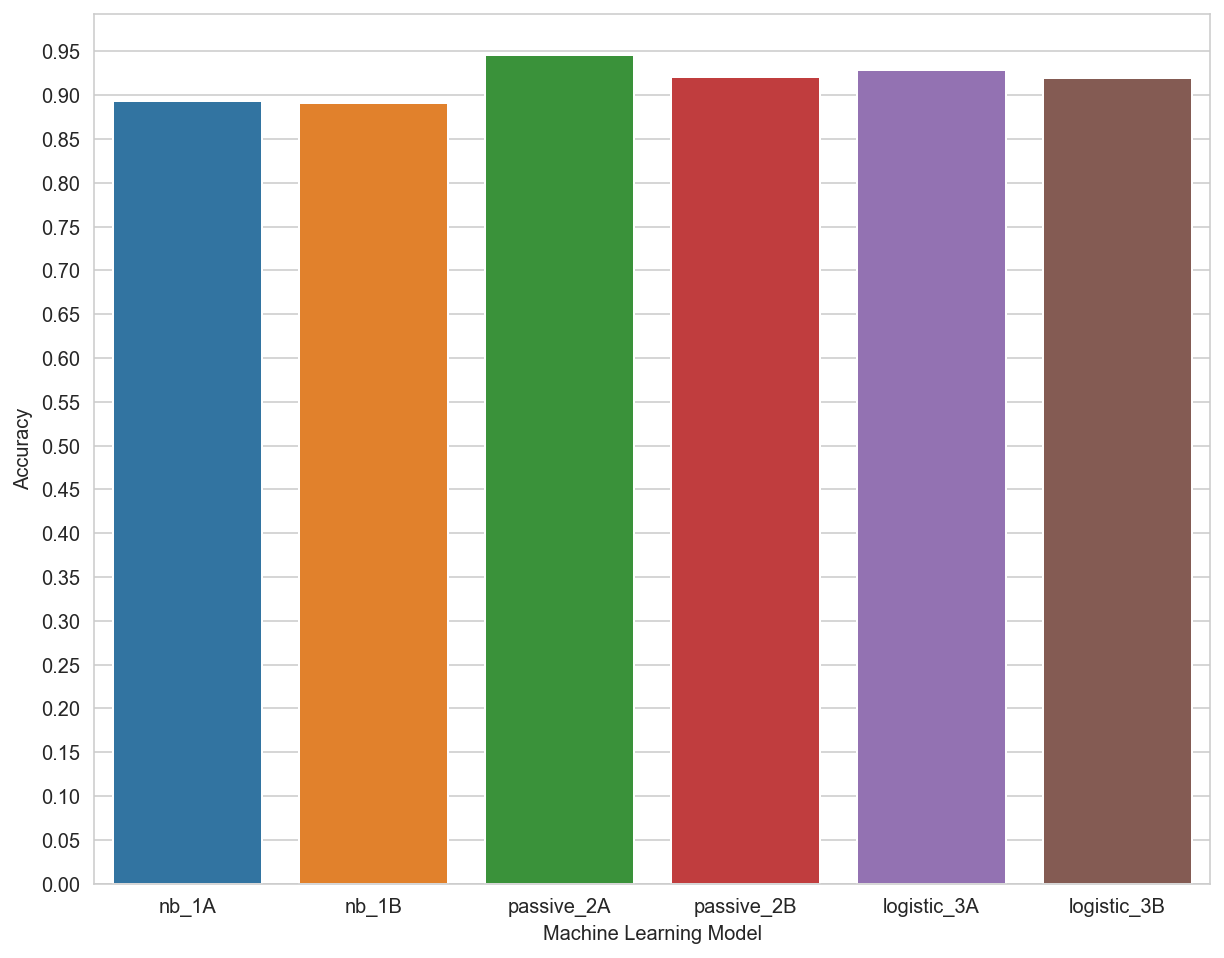

In [52]:
model = ['nb_1A', 'nb_1B','passive_2A','passive_2B','logistic_3A','logistic_3B']
Accuracy = [accuracy_pred_nb_1A,accuracy_pred_nb_1B, accuracy_passive_2A ,accuracy_passive_2B,accuracy_logistic_3A,accuracy_logistic_3B]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()